In [1]:
## ANN chiller group model
import pandas as pd

# Load the data
data = pd.read_csv('Electrical_annual.csv')

# Display the first few rows of the dataset
print(data.shape)
data.drop_duplicates(subset = ['Time'], inplace = True)
print(data.shape)
data.reset_index(drop = True, inplace = True)
data.head()
data["electricalGroup.Soc_duplicate"] = data['electricalGroup.Soc'].iloc[1:].tolist() + [0.24]


(8760, 13)
(8760, 13)


In [2]:
data.head(-5)

,Time,hour,electricalGroup.Ir,electricalGroup.Pdem,electricalGroup.Ppla,electricalGroup.Pgen,electricalGroup.Soc,electricalGroup.batCon1.chaCyc.active,electricalGroup.batCon1.staBy.active,electricalGroup.batCon1.disCyc.active,electricalGroup.Ppv,electricalGroup.Pbat,electricalGroup.Pgri.real,electricalGroup.Soc_duplicate
0,0,0,0.000000e+00,-13743697.00,-2.659938e+04,7196211.000,0.500000,0,0,1,0.000000,0.000000e+00,6574085.000,0.044651
1,3600,1,0.000000e+00,-13694478.00,-5.000000e+03,7443017.497,0.044651,0,1,0,0.000000,1.896274e-02,6256460.323,0.044651
2,7200,2,0.000000e+00,-13614159.00,-5.000000e+03,7723730.513,0.044651,0,1,0,0.000000,4.870000e-21,5895427.991,0.044651
3,10800,3,0.000000e+00,-13733017.01,-5.000000e+03,7987978.513,0.044651,0,1,0,0.000000,-1.180000e-42,5750038.494,0.044651
4,14400,4,0.000000e+00,-13881640.00,-5.000000e+03,8271585.012,0.044651,0,1,0,0.000000,0.000000e+00,5615055.496,0.044651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8750,31500000,8750,2.813573e+02,-14476045.01,3.340000e-25,4592932.494,0.045556,0,1,0,546958.637900,0.000000e+00,9336153.010,0.045556
8751,31503600,8751,1.613867e+02,-14461637.00,3.340000e-25,4754037.500,0.045556,0,1,0,313735.822700,0.000000e+00,9393862.999,0.045556
8752,31507200,8752,4.704450e+01,-14623100.00,3.340000e-25,5032681.010,0.045556,0,1,0,91454.514050,0.000000e+00,9498965.000,0.045556
8753,31510800,8753,5.853007e+00,-14457014.00,3.340000e-25,5276980.513,0.045556,0,1,0,11378.251070,0.000000e+00,9168656.013,0.045556


In [3]:
inputs = ['electricalGroup.Ir', 'electricalGroup.Pdem', 'electricalGroup.Ppla', 'electricalGroup.Pgen',  'electricalGroup.Soc', "electricalGroup.batCon1.chaCyc.active", "electricalGroup.batCon1.staBy.active", "electricalGroup.batCon1.disCyc.active"] ##States and actions
outputs = ['electricalGroup.Ppv', 'electricalGroup.Soc_duplicate', 'electricalGroup.Pbat', 'electricalGroup.Pgri.real'] 

columns = inputs + outputs


In [4]:
# Outlier clipping


mean = data[columns].mean()
q1 = data[columns].quantile(0.25)
q3 = data[columns].quantile(0.75)
iqr = q3 - q1
# data[columns] = data[columns].clip(q1 - 1.5*iqr, q3 + 1.5*iqr, axis = 1)
data.head()

,Time,hour,electricalGroup.Ir,electricalGroup.Pdem,electricalGroup.Ppla,electricalGroup.Pgen,electricalGroup.Soc,electricalGroup.batCon1.chaCyc.active,electricalGroup.batCon1.staBy.active,electricalGroup.batCon1.disCyc.active,electricalGroup.Ppv,electricalGroup.Pbat,electricalGroup.Pgri.real,electricalGroup.Soc_duplicate
0,0,0,0.0,-13743697.00,-26599.38477,7196211.000,0.500000,0,0,1,0.0,0.000000e+00,6574085.000,0.044651
1,3600,1,0.0,-13694478.00,-5000.00000,7443017.497,0.044651,0,1,0,0.0,1.896274e-02,6256460.323,0.044651
2,7200,2,0.0,-13614159.00,-5000.00000,7723730.513,0.044651,0,1,0,0.0,4.870000e-21,5895427.991,0.044651
3,10800,3,0.0,-13733017.01,-5000.00000,7987978.513,0.044651,0,1,0,0.0,-1.180000e-42,5750038.494,0.044651
4,14400,4,0.0,-13881640.00,-5000.00000,8271585.012,0.044651,0,1,0,0.0,0.000000e+00,5615055.496,0.044651


In [5]:
X = data[inputs]
y = data[outputs]

In [6]:
X.head()

,electricalGroup.Ir,electricalGroup.Pdem,electricalGroup.Ppla,electricalGroup.Pgen,electricalGroup.Soc,electricalGroup.batCon1.chaCyc.active,electricalGroup.batCon1.staBy.active,electricalGroup.batCon1.disCyc.active
0,0.0,-13743697.00,-26599.38477,7196211.000,0.500000,0,0,1
1,0.0,-13694478.00,-5000.00000,7443017.497,0.044651,0,1,0
2,0.0,-13614159.00,-5000.00000,7723730.513,0.044651,0,1,0
3,0.0,-13733017.01,-5000.00000,7987978.513,0.044651,0,1,0
4,0.0,-13881640.00,-5000.00000,8271585.012,0.044651,0,1,0


In [7]:
y.head()

,electricalGroup.Ppv,electricalGroup.Soc_duplicate,electricalGroup.Pbat,electricalGroup.Pgri.real
0,0.0,0.044651,0.000000e+00,6574085.000
1,0.0,0.044651,1.896274e-02,6256460.323
2,0.0,0.044651,4.870000e-21,5895427.991
3,0.0,0.044651,-1.180000e-42,5750038.494
4,0.0,0.044651,0.000000e+00,5615055.496


In [8]:
X.shape

(8760, 8)

In [9]:
y.shape

(8760, 4)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Split the data
# X_train, X_test, y_train, y_test = X.iloc[:int(0.8*len(X))], X.iloc[int(0.8*len(X)):], y.iloc[:int(0.8*len(y))], y.iloc[int(0.8*len(y)):]

# Normalize the features
scaler_X = MinMaxScaler().fit(X_train.values)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

scaler_y = MinMaxScaler().fit(y_train.values)
y_train = scaler_y.transform(y_train)
y_test = scaler_y.transform(y_test)



c:\Users\sba5847\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
c:\Users\sba5847\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
c:\Users\sba5847\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
c:\Users\sba5847\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [12]:
X_train.shape

(6132, 8)

In [13]:
X_train.shape[1]

8

In [14]:
import torch
import torch.nn as nn
import pytorch_lightning as pl
from torch.utils.data import DataLoader, TensorDataset

# Define the PyTorch model
class ElectricalTimeSeriesModel(pl.LightningModule):
    def __init__(self, input_size, output_size, learning_rate=1e-3, n_timesteps = 10):
        super(ElectricalTimeSeriesModel, self).__init__()
        self.learning_rate = learning_rate
        
        # Define the architecture
        self.model = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.Sigmoid(),
            nn.Linear(128, 64),
            nn.Sigmoid(),
            nn.Linear(64, output_size),
            nn.Sigmoid(),
        )
        
        # Loss function
        self.loss_fn = nn.MSELoss()
        self.n_timesteps = n_timesteps
    
    def forward(self, x):
        return self.model(x)
    
    def training_step(self, batch, batch_idx):
        X_batch, y_batch = batch
        
        loss = 0.0
        
        pred = self.model(X_batch)
        loss+= self.loss_fn(pred, y_batch)
        
        self.log("loss", loss, on_step = True, on_epoch=True, prog_bar=True, logger=True)
        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        return optimizer

    @torch.no_grad()
    def step(self, state, action):
        
        input_state = torch.tensor(np.concatenate([state, action])).float()
        output = self(input_state).numpy()[0]
        return output
# Create the PyTorch Lightning Trainer
trainer = pl.Trainer(max_epochs=150, logger=True)

# Assuming X_train and y_train are your data as PyTorch tensors
# Convert your dataset to PyTorch DataLoader
train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Instantiate the model
input_size = X_train.shape[1]
output_size = len(outputs)
model = ElectricalTimeSeriesModel(input_size, output_size)

# Train the model
trainer.fit(model, train_loader)


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name    | Type       | Params | Mode 
-----------------------------------------------
0 | model   | Sequential | 9.7 K  | train
1 | loss_fn | MSELoss    | 0      | train
-----------------------------------------------
9.7 K     Trainable params
0         Non-trainable params
9.7 K     Total params
0.039     Total estimated model params size (MB)
8         Modules in train mode
0         Modules in eval mode
c:\Users\sba5847\AppData\Local\anaconda3\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=150` reached.


In [15]:
import pickle
trainer.save_checkpoint("src/pickled_models/electrical_model.ckpt")
pickle.dump(scaler_X, open('src/pickled_models/electrical_scaler_X.pkl', 'wb'))
pickle.dump(scaler_y, open('src/pickled_models/electrical_scaler_y.pkl', 'wb'))

In [16]:
# Make predictions
import matplotlib.pyplot as plt
with torch.no_grad():
    y_pred = model(torch.Tensor(X_test)).numpy()

# Convert predictions and actual values to DataFrames for easier manipulation
predictions_df = pd.DataFrame(scaler_y.inverse_transform(y_pred), columns=outputs)
actuals_df = pd.DataFrame(scaler_y.inverse_transform(y_test), columns=outputs)



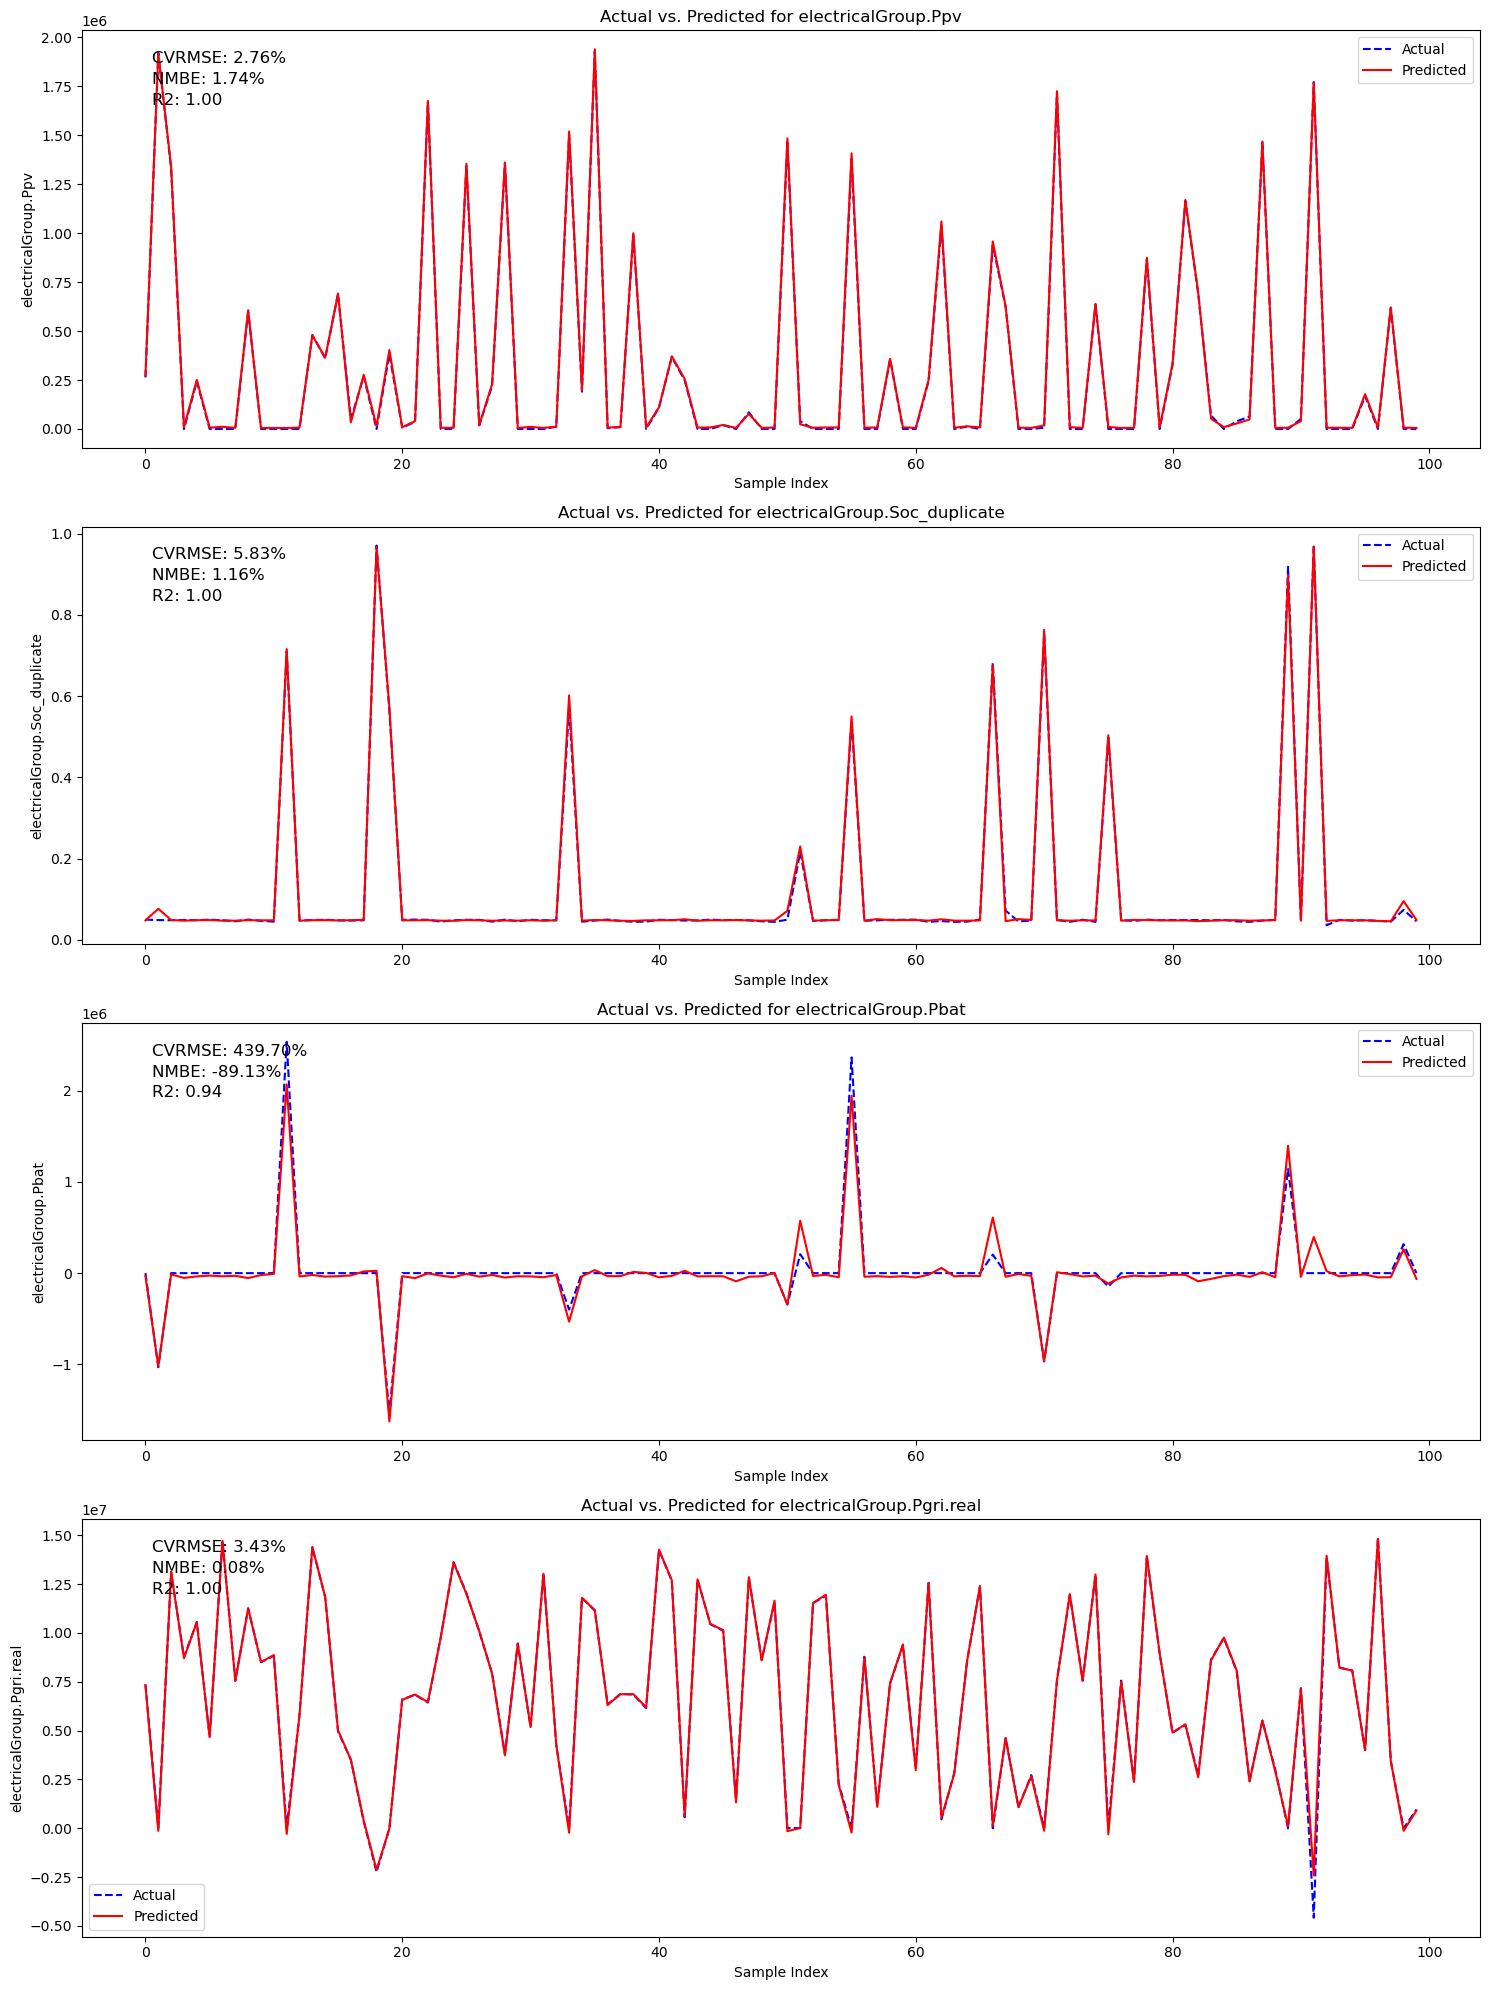

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def calculate_metrics(actuals, predictions):
    metrics = {}
    for output in actuals.columns:
        actual_values = actuals[output]
        predicted_values = predictions[output]
        
        # Calculate metrics
        mse = mean_squared_error(actual_values, predicted_values)
        rmse = np.sqrt(mse)
        mean_actual = np.mean(actual_values)
        
        # CVRMSE (Coefficient of Variation of RMSE)
        cvrmse = (rmse / mean_actual) * 100
        
        # NMBE (Normalized Mean Bias Error)
        nmbe = (np.mean(predicted_values - actual_values) / mean_actual) * 100
        
        # R2 (Coefficient of Determination)
        r2 = r2_score(actual_values, predicted_values)
        
        metrics[output] = {'CVRMSE': cvrmse, 'NMBE': nmbe, 'R2': r2}
    return metrics

def plot_actual_vs_predicted(actuals, predictions, output_names):
    metrics = calculate_metrics(actuals, predictions)
    
    num_outputs = len(output_names)
    plt.figure(figsize=(15, num_outputs * 5))
    
    for i, output in enumerate(output_names):
        plt.subplot(num_outputs, 1, i + 1)
        plt.plot(actuals.index, actuals[output], label='Actual', color='blue', linestyle='--')
        plt.plot(predictions.index, predictions[output], label='Predicted', color='red', linestyle='-')
        
        # Retrieve metrics for current output
        cvrmse = metrics[output]['CVRMSE']
        nmbe = metrics[output]['NMBE']
        r2 = metrics[output]['R2']
        
        # Print metrics on plot
        plt.title(f'Actual vs. Predicted for {output}')
        plt.xlabel('Sample Index')
        plt.ylabel(output)
        plt.legend()
        plt.text(0.05, 0.95, f'CVRMSE: {cvrmse:.2f}%', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
        plt.text(0.05, 0.90, f'NMBE: {nmbe:.2f}%', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
        plt.text(0.05, 0.85, f'R2: {r2:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
    
    plt.tight_layout()
    plt.show()

# Call the updated plotting function
plot_actual_vs_predicted(actuals_df[:100], predictions_df[:100], outputs)


In [ ]:
predictions = []

with torch.no_grad():
    prediction = model(torch.Tensor(X_test[0].reshape(1, -1))).numpy()
    predictions.append(prediction)
    for row_idx in range(1, 500):

        
        prediction = model(torch.Tensor(np.concatenate([X_test[row_idx][:6], prediction.reshape(-1, )]).reshape(1, -1))).numpy()
        predictions.append(prediction)

    predictions = np.array(predictions)
    predictions_df = pd.DataFrame(scaler_y.inverse_transform(predictions.reshape(-1, 15)), columns=outputs)
    actuals_df = pd.DataFrame(scaler_y.inverse_transform(y_test[:500]), columns=outputs)    
    plot_actual_vs_predicted(actuals_df, predictions_df, outputs)
